In [1]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1lWb5CGxLPvxdnPWB4rQzzQc9GfGxGXwF/view?usp=sharing'

In [4]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1lWb5CGxLPvxdnPWB4rQzzQc9GfGxGXwF


In [5]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('Classified Disease.zip')

In [6]:
file_zip = 'Classified Disease.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./Classified Disease 2/')
zip_ref.close()

print(os.listdir('/content/Classified Disease 2'))

['Septoria Blight on lettuce', 'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy', 'others', 'Bacterial', 'Downy mildew on lettuce']


In [7]:
listdir_image = os.listdir('/content/Classified Disease 2')
print(listdir_image)

['Septoria Blight on lettuce', 'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy', 'others', 'Bacterial', 'Downy mildew on lettuce']


In [8]:
# check the amount of data for each part
dir_image = '/content/Classified Disease 2'

for item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item, " : ",len(os.listdir(class_dir)),"images")

Septoria Blight on lettuce  :  19 images
Wilt and leaf blight on lettuce  :  6 images
powdery mildew on lettuce  :  21 images
healthy  :  20 images
others  :  2 images
Bacterial  :  20 images
Downy mildew on lettuce  :  30 images


In [9]:
#delete directory that is not used
list_category = ['Downy mildew on lettuce', 'Septoria Blight on lettuce', 'Bacterial',
                'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
      os.remove(path)
    elif os.path.isdir(path):
      shutil.rmtree(path)
    else:
      print("Unknown or already remove!")

listdir_image = os.listdir(dir_image)
listdir_image


['Septoria Blight on lettuce',
 'Wilt and leaf blight on lettuce',
 'powdery mildew on lettuce',
 'healthy',
 'Bacterial',
 'Downy mildew on lettuce']

In [10]:
# check image(count, size, total)
from PIL import Image
total = 0
size = (0,0)

for x in listdir_image:
  dir = os.path.join(dir_image,x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total += y

  img_name = os.listdir(dir)
  for i in range(2):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)

    if size == img.size:
      continue
    else:
      size = img.size
      print('+ size', img.size)

print('\nTotal: ', total)

Septoria Blight on lettuce: 19
+ size (1200, 770)
+ size (251, 300)
Wilt and leaf blight on lettuce: 6
+ size (276, 183)
+ size (474, 327)
powdery mildew on lettuce: 21
+ size (358, 238)
+ size (252, 200)
healthy: 20
+ size (474, 355)
Bacterial: 20
+ size (474, 316)
+ size (474, 355)
Downy mildew on lettuce: 30
+ size (1024, 769)
+ size (940, 474)

Total:  116


Septoria Blight on lettuce


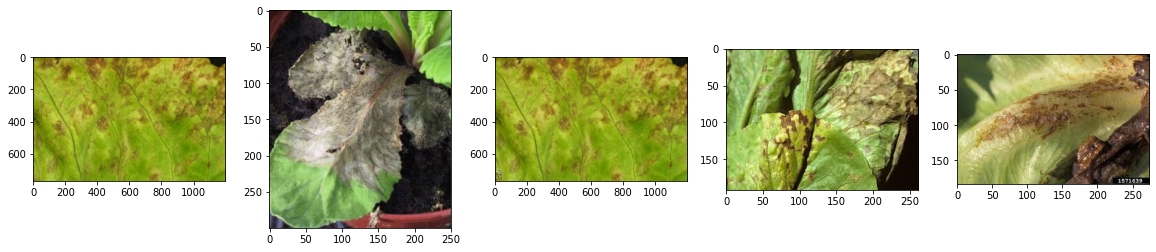

Wilt and leaf blight on lettuce


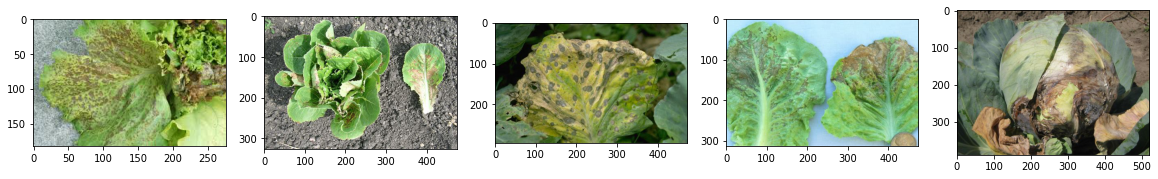

powdery mildew on lettuce


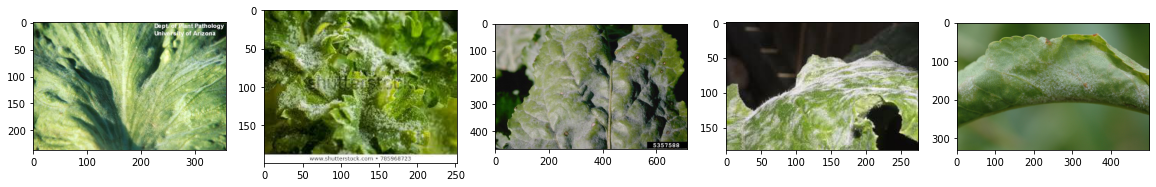

healthy


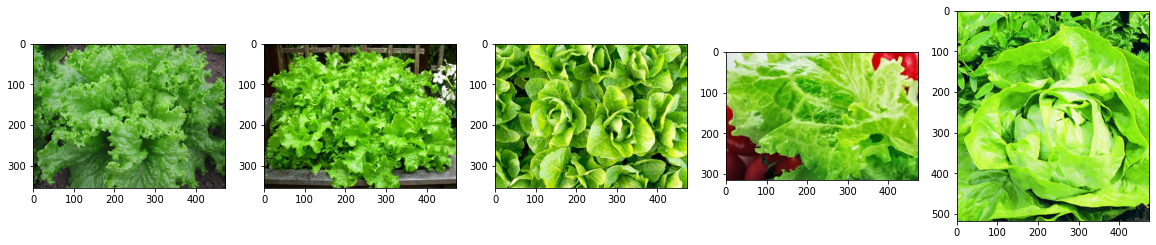

Bacterial


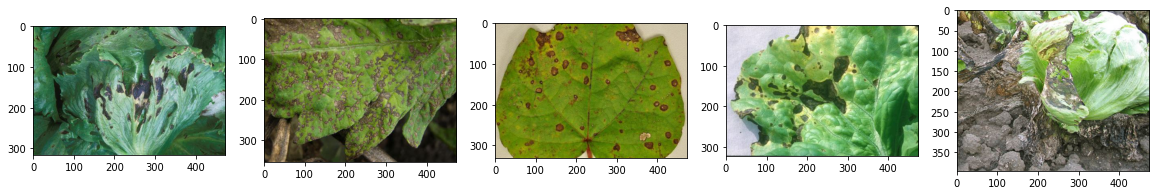

Downy mildew on lettuce


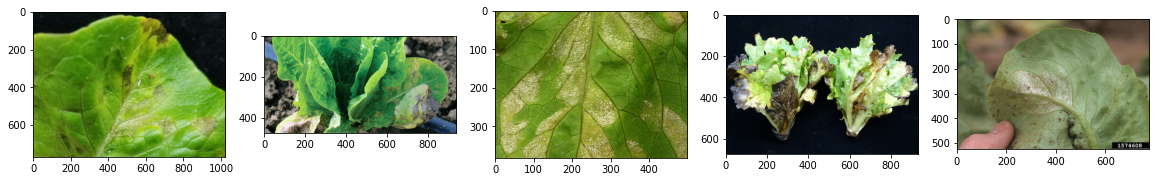

In [11]:
# check image class
for item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image, item)
  class_image = os.listdir(class_dir)
  plt.figure(figsize=(20,4))
  for i, img_path in enumerate(class_image[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modelling**

In [12]:
# Importing library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

# Splitting Data
Install `split_folders` for splitting data to train and validation

In [13]:
!pip install split-folders

In [14]:
import splitfolders

splitfolders.ratio(dir_image, output='/content/ClassifiedDiseaseFiltered',
                   seed = 1337, ratio=(.8, .2))

Copying files: 116 files [00:00, 3481.77 files/s]


# Image Augmentation

In [15]:
dir_train = '/content/ClassifiedDiseaseFiltered/train'
dir_val = '/content/ClassifiedDiseaseFiltered/val'

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
batch_size=128
train_generator = train_datagen.flow_from_directory(
    dir_train,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    dir_val,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 91 images belonging to 6 classes.
Found 25 images belonging to 6 classes.
